#                          <center> <div color = "blue">INTELLIGENCE ARTIFICIELLE</div> <br /><br /> PROJET IA for HumanForYou
</center>        





###                             <center> CESICDP GROUPE 2 </center>

#####  <center> Adrian SALAUM <br /><br /> Coralistone METSA<br /><br /> Romain COTTINEAU  <br /><br />Simon BRIFFAUD <br /><br /> </center>


##### ########################################################################################################################

##### ########################################################################################################################

##                     <center> <br />  I. RAPPEL DU CONTEXTE </center>                                                     

L'entreprise de produits pharmaceutiques HumanForYou basée en Inde emploie environ 4000 personnes. Cependant, chaque année elle subit un turn-over d'environ 15% de ses employés nécessitant de retrouver des profils similaires sur le marché de l'emploi.

La direction trouve que ce niveau de turn-over n'est pas bon pour l'entreprise car :

Les projets sur lesquels étaient les employés quittant la société prennent du retard ce qui nuit à la réputation de l'entreprise auprès de ses clients et partenaires.

Un service de ressources humaines de taille conséquente doit être conservé car il faut avoir les moyens de trouver les nouvelles recrues.

Du temps est perdu à l'arrivée des nouveaux employés car ils doivent très souvent être formés et ont besoin de temps pour devenir pleinement opérationnels dans leur nouvel environnement.

Le direction fait donc appel à vous, spécialistes de l'analyse de données, pour déterminer les facteurs ayant le plus d'influence sur ce taux de turn-over et lui proposer des modèles afin d'avoir des pistes d'amélioration pour donner à leurs employés l'envie de rester.

Données fournies
Un certain nombre de données concernant les employés vous a donc été transmis par le service des ressources humaines.

Il s'agit de fichiers textes au format CSV.

Les données ont été anonymisées : un employé de l'entreprise sera représenté par le même EmployeeID dans l'ensemble des fichiers qui suivent.

##               <center>  <br /> <br /> II. Pre-traitement des données et analyse exploratoire </center>   

Voici quelques étapes à suivre pour pré-traiter les données pour une utilisation avec K-means :

1. Intégration des données : Intégrez les données des différentes sources en une seule source de données. Si vous travaillez avec des données provenant de plusieurs sources, vous devez les intégrer en une seule source de données. Cela vous permettra de traiter les données comme une seule entité et de les analyser plus facilement.

1. Nettoyer les données : Assurez-vous que vos données sont propres et ne contiennent pas de valeurs manquantes, de doublons ou d'autres anomalies. Si nécessaire, supprimez ou remplacez les données manquantes.

2. Normaliser les données : Normalisez les données en les mettant à l'échelle de sorte que chaque variable ait une plage de valeurs comparable. La normalisation peut être effectuée en utilisant la méthode de la moyenne et de l'écart type, la méthode de la plage ou la méthode de la normalisation de l'amplitude.

3. Réduire la dimensionnalité : Si vous travaillez avec des données à haute dimensionnalité, utilisez des techniques de réduction de dimensionnalité telles que l'analyse en composantes principales (PCA) pour réduire la dimensionnalité de vos données et faciliter leur analyse.

4. Identifier les valeurs aberrantes : Les valeurs aberrantes peuvent fausser les résultats de K-means, il est donc important de les identifier et de les traiter correctement. Les valeurs aberrantes peuvent être supprimées ou remplacées par des valeurs plus appropriées.

5. Sélectionner les caractéristiques : Si vous travaillez avec des données qui contiennent de nombreuses caractéristiques, il peut être judicieux de sélectionner les caractéristiques les plus pertinentes pour votre analyse.

En résumé, le pré-traitement des données pour K-means comprend le nettoyage des données, la normalisation des données, la réduction de la dimensionnalité, l'identification et le traitement des valeurs aberrantes et la sélection des caractéristiques. En effectuant ces étapes, vous pouvez améliorer la qualité de vos données et obtenir des résultats plus significatifs à l'aide de K-means.

##  <center>  <br /> <br /> 1. Data wrangling </center>
Puisque les données proviennent d'un fichier CSV, nous utiliserons la fonction read_csv de Pandas pour charger les données dans un DataFrame.

### Ca c'est avant de charger les données.

In [1]:
import os
import tarfile
from six.moves import urllib
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

DOWNLOAD_URLS = [
    "https://raw.githubusercontent.com/ArkaniosCesi/IA_project/main/employee_survey_data.csv",
    "https://raw.githubusercontent.com/ArkaniosCesi/IA_project/main/general_data.csv",
    "https://raw.githubusercontent.com/ArkaniosCesi/IA_project/main/in_time.csv",
    "https://raw.githubusercontent.com/ArkaniosCesi/IA_project/main/manager_survey_data.csv",
    "https://raw.githubusercontent.com/ArkaniosCesi/IA_project/main/out_time.csv"
]
HOUSING_PATH = os.path.join("datasets", "employees")

def load_project_data(download_urls=DOWNLOAD_URLS, housing_path=HOUSING_PATH):    
    dataframes = {}
    
    for url in DOWNLOAD_URLS:
        file_name = url.split('/')[-1].split('.')[0]
        df = pd.read_csv(url)
        if df.keys()[0] != "EmployeeID":
            df.rename({df.keys()[0]:"EmployeeID"}, axis='columns', errors="raise", inplace=True)
        df.set_index("EmployeeID", inplace=True)
        dataframes[file_name] = df
    
    return dataframes

In [94]:
import warnings
warnings.filterwarnings('ignore')

#### On vérifie si les données sont correctement chargées

In [2]:
data = load_project_data()

In [3]:
general_df = pd.concat(data.values(), axis=1, keys=data.keys())
general_df.head()

employee_survey_data                                  \
           EnvironmentSatisfaction JobSatisfaction WorkLifeBalance   
EmployeeID                                                           
1                              3.0             4.0             2.0   
2                              3.0             2.0             4.0   
3                              2.0             2.0             1.0   
4                              4.0             4.0             3.0   
5                              4.0             1.0             3.0   

           general_data                                                       \
                    Age Attrition     BusinessTravel              Department   
EmployeeID                                                                     
1                    51        No      Travel_Rarely                   Sales   
2                    31       Yes  Travel_Frequently  Research & Development   
3                    32        No  Travel_Frequently  Research & Development   
4                    38        No         Non-Travel  Research & Development   
5                    32        No      Travel_Rarely  Research & Development   

                                                      ...  \
           DistanceFromHome Education EducationField  ...   
EmployeeID                                            ...   
1                         6         2  Life Sciences  ...   
2                        10         1  Life Sciences  ...   
3                        17         4          Other  ...   
4                         2         5  Life Sciences  ...   
5                        10         1        Medical  ...   

                       out_time                                            \
                     2015-12-18           2015-12-21           2015-12-22   
EmployeeID                                                                  
1                           NaN  2015-12-21 17:15:50  2015-12-22 17:27:51   
2           2015-12-18 18:31:28  2015-12-21 17:34:16  2015-12-22 18:16:35   
3           2015-12-18 17:02:23  2015-12-21 17:20:17  2015-12-22 16:32:50   
4           2015-12-18 17:55:23  2015-12-21 16:49:09  2015-12-22 17:24:00   
5           2015-12-18 17:52:48  2015-12-21 17:43:35  2015-12-22 18:07:57   

                                                                 \
                     2015-12-23           2015-12-24 2015-12-25   
EmployeeID                                                        
1           2015-12-23 16:44:44  2015-12-24 17:47:22        NaN   
2           2015-12-23 17:38:18                  NaN        NaN   
3           2015-12-23 16:59:43  2015-12-24 16:58:25        NaN   
4           2015-12-23 17:36:35  2015-12-24 16:48:21        NaN   
5           2015-12-23 18:00:49  2015-12-24 17:59:22        NaN   

                                                                           \
                     2015-12-28           2015-12-29           2015-12-30   
EmployeeID                                                                  
1           2015-12-28 18:00:07  2015-12-29 17:22:30  2015-12-30 17:40:56   
2           2015-12-28 17:08:38  2015-12-29 17:54:46  2015-12-30 18:31:35   
3           2015-12-28 16:43:31  2015-12-29 17:09:56  2015-12-30 17:06:25   
4           2015-12-28 17:19:34  2015-12-29 16:58:16  2015-12-30 17:40:11   
5           2015-12-28 17:44:59  2015-12-29 18:47:00  2015-12-30 17:15:33   

                                 
                     2015-12-31  
EmployeeID                       
1           2015-12-31 17:17:33  
2           2015-12-31 17:40:58  
3           2015-12-31 17:15:50  
4           2015-12-31 17:09:14  
5           2015-12-31 17:42:14  

[5 rows x 550 columns]

#### On affiche la description des colonnes pour chaque jeu de données

On visualise ainsi quelles colonnes ont déjà des valeurs numériques ou non

In [4]:
general_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 1 to 4410
Columns: 550 entries, ('employee_survey_data', 'EnvironmentSatisfaction') to ('out_time', '2015-12-31')
dtypes: float64(29), int64(15), object(506)
memory usage: 18.5+ MB


In [5]:
general_df.describe()

employee_survey_data                                 general_data  \
      EnvironmentSatisfaction JobSatisfaction WorkLifeBalance          Age   
count             4385.000000     4390.000000     4372.000000  4410.000000   
mean                 2.723603        2.728246        2.761436    36.923810   
std                  1.092756        1.101253        0.706245     9.133301   
min                  1.000000        1.000000        1.000000    18.000000   
25%                  2.000000        2.000000        2.000000    30.000000   
50%                  3.000000        3.000000        3.000000    36.000000   
75%                  4.000000        4.000000        3.000000    43.000000   
max                  4.000000        4.000000        4.000000    60.000000   

                                                                               \
      DistanceFromHome    Education EmployeeCount     JobLevel  MonthlyIncome   
count      4410.000000  4410.000000        4410.0  4410.000000    4410.000000   
mean          9.192517     2.912925           1.0     2.063946   65029.312925   
std           8.105026     1.023933           0.0     1.106689   47068.888559   
min           1.000000     1.000000           1.0     1.000000   10090.000000   
25%           2.000000     2.000000           1.0     1.000000   29110.000000   
50%           7.000000     3.000000           1.0     2.000000   49190.000000   
75%          14.000000     4.000000           1.0     3.000000   83800.000000   
max          29.000000     5.000000           1.0     5.000000  199990.000000   

                          ...   out_time                                   \
      NumCompaniesWorked  ... 2015-01-26 2015-03-05 2015-05-01 2015-07-17   
count        4391.000000  ...        0.0        0.0        0.0        0.0   
mean            2.694830  ...        NaN        NaN        NaN        NaN   
std             2.498887  ...        NaN        NaN        NaN        NaN   
min             0.000000  ...        NaN        NaN        NaN        NaN   
25%             1.000000  ...        NaN        NaN        NaN        NaN   
50%             2.000000  ...        NaN        NaN        NaN        NaN   
75%             4.000000  ...        NaN        NaN        NaN        NaN   
max             9.000000  ...        NaN        NaN        NaN        NaN   

                                                                         
      2015-09-17 2015-10-02 2015-11-09 2015-11-10 2015-11-11 2015-12-25  
count        0.0        0.0        0.0        0.0        0.0        0.0  
mean         NaN        NaN        NaN        NaN        NaN        NaN  
std          NaN        NaN        NaN        NaN        NaN        NaN  
min          NaN        NaN        NaN        NaN        NaN        NaN  
25%          NaN        NaN        NaN        NaN        NaN        NaN  
50%          NaN        NaN        NaN        NaN        NaN        NaN  
75%          NaN        NaN        NaN        NaN        NaN        NaN  
max          NaN        NaN        NaN        NaN        NaN        NaN  

[8 rows x 44 columns]

#### On encode les colonnes non-numériques

On encode les chaînes de caractères récurrentes en associant chaque chaîne à un nombre.
On encode les dates en les convertissant en secondes.

In [6]:
from sklearn.preprocessing import OrdinalEncoder
from pandas.api.types import is_numeric_dtype

def encodeNonNumericColumns(df, table_name):
    table = data[table_name]
    fields_encoded = {}

    for column in table.columns:
        if not is_numeric_dtype(table[column]):
            field = table[[column]]
            ordinal_encoder = OrdinalEncoder()
            field_encoded = ordinal_encoder.fit_transform(field)
            fields_encoded[column] = field_encoded

    for key in fields_encoded.keys():
        df.loc[:, (table_name, key)] = fields_encoded[key]

In [7]:
# transforme dates dans df['out_time'] et df['in_time'] en numérique
from datetime import datetime

def transformDateToNumeric(df, table_name):
    table = df[table_name]
    for column in table.columns:
        if not is_numeric_dtype(table[column]):
            df.loc[:, (table_name, column)] = df.loc[:, (table_name, column)].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').timestamp() if not pd.isna(x) else x)

# remmetre les colonnes date numérique en date
def transformNumericToDate(df, table_name):
    table = df[table_name]
    for column in table.columns:
        if is_numeric_dtype(table[column]):
            df.loc[:, (table_name, column)] = df.loc[:, (table_name, column)].apply(lambda x: datetime.fromtimestamp(x) if not pd.isna(x) else x)

In [8]:
def fillEmptyValues(df, table_name):
    table = df[table_name]
    for column in table.columns:
        if not is_numeric_dtype(table[column]):
            median = 0.0
        else:
            median = table[column].median()
        df.loc[:, (table_name, column)].fillna(median, inplace=True)

In [9]:
def checkIfTableIsFull(df, table_name):
    table = df[table_name]
    res = True
    for column in table.columns:
        if df.loc[:, (table_name, column)].isnull().any():
            res = False
    print(res)

In [10]:
df_non_ethical = general_df.copy()

In [11]:
encodeNonNumericColumns(df_non_ethical, "general_data")

fillEmptyValues(df_non_ethical, "general_data")
fillEmptyValues(df_non_ethical, "employee_survey_data")
fillEmptyValues(df_non_ethical, "manager_survey_data")

transformDateToNumeric(df_non_ethical, "out_time")
transformDateToNumeric(df_non_ethical, "in_time")
fillEmptyValues(df_non_ethical, "out_time")
fillEmptyValues(df_non_ethical, "in_time")

In [12]:
df_non_ethical.head()

employee_survey_data                                  \
           EnvironmentSatisfaction JobSatisfaction WorkLifeBalance   
EmployeeID                                                           
1                              3.0             4.0             2.0   
2                              3.0             2.0             4.0   
3                              2.0             2.0             1.0   
4                              4.0             4.0             3.0   
5                              4.0             1.0             3.0   

           general_data                                                       \
                    Age Attrition BusinessTravel Department DistanceFromHome   
EmployeeID                                                                     
1                    51       0.0            2.0        2.0                6   
2                    31       1.0            1.0        1.0               10   
3                    32       0.0            1.0        1.0               17   
4                    38       0.0            0.0        1.0                2   
5                    32       0.0            2.0        1.0               10   

                                     ...      out_time                \
           Education EducationField  ...    2015-12-18    2015-12-21   
EmployeeID                           ...                               
1                  2            1.0  ...  1.450456e+09  1.450715e+09   
2                  1            1.0  ...  1.450460e+09  1.450716e+09   
3                  4            4.0  ...  1.450455e+09  1.450715e+09   
4                  5            1.0  ...  1.450458e+09  1.450713e+09   
5                  1            3.0  ...  1.450458e+09  1.450716e+09   

                                                                               \
              2015-12-22    2015-12-23    2015-12-24 2015-12-25    2015-12-28   
EmployeeID                                                                      
1           1.450802e+09  1.450885e+09  1.450976e+09        NaN  1.451322e+09   
2           1.450805e+09  1.450889e+09  1.450974e+09        NaN  1.451319e+09   
3           1.450798e+09  1.450886e+09  1.450973e+09        NaN  1.451317e+09   
4           1.450801e+09  1.450889e+09  1.450972e+09        NaN  1.451320e+09   
5           1.450804e+09  1.450890e+09  1.450976e+09        NaN  1.451321e+09   

                                                      
              2015-12-29    2015-12-30    2015-12-31  
EmployeeID                                            
1           1.451406e+09  1.451494e+09  1.451579e+09  
2           1.451408e+09  1.451497e+09  1.451580e+09  
3           1.451405e+09  1.451492e+09  1.451579e+09  
4           1.451405e+09  1.451494e+09  1.451578e+09  
5           1.451411e+09  1.451492e+09  1.451580e+09  

[5 rows x 550 columns]

#### On supprime des colonnes jugées inutiles pour créer un nouveau Dataframe plus éthique

In [13]:
def dropColumns(df, table_name, columns_to_drop=""):
    table = df[table_name]
    if columns_to_drop == "":
        for column in table.columns:
            if df.loc[:, (table_name, column)].isnull().any():
                df.drop((table_name, column), axis=1, inplace=True)
    else:
        for column in columns_to_drop:
            df.drop((table_name, column), axis=1, inplace=True)

In [74]:
dropColumns(df_non_ethical, "in_time")
dropColumns(df_non_ethical, "out_time")

df_ethical = df_non_ethical.copy()

columns_to_drop = [
    "MaritalStatus",
    "Over18",
    "StandardHours",
    "StockOptionLevel",
    "TrainingTimesLastYear",
    "Gender"
]

dropColumns(df_ethical, "general_data", columns_to_drop)

#### On met toutes les valeurs numériques à la même échelle

In [106]:
from sklearn.preprocessing import MinMaxScaler

def normalizeColumns(df):
    for table_name in df.columns.get_level_values(0).unique():
        table = df[table_name]
        for column in table.columns:
            if is_numeric_dtype(table[column]):
                scaler = MinMaxScaler()
                df.loc[:, (table_name, column)] = scaler.fit_transform(df.loc[:, (table_name, column)].values.reshape(-1, 1))

In [122]:
normalizeColumns(df_ethical)
normalizeColumns(df_non_ethical)

In [123]:
df_non_ethical.head()

employee_survey_data                                  \
           EnvironmentSatisfaction JobSatisfaction WorkLifeBalance   
EmployeeID                                                           
1                         0.666667        1.000000        0.333333   
2                         0.666667        0.333333        1.000000   
3                         0.333333        0.333333        0.000000   
4                         1.000000        1.000000        0.666667   
5                         1.000000        0.000000        0.666667   

           general_data                                                       \
                    Age Attrition BusinessTravel Department DistanceFromHome   
EmployeeID                                                                     
1              0.785714       0.0            1.0        1.0         0.178571   
2              0.309524       1.0            0.5        0.5         0.321429   
3              0.333333       0.0            0.5        0.5         0.571429   
4              0.476190       0.0            0.0        0.5         0.035714   
5              0.333333       0.0            1.0        0.5         0.321429   

                                     ...   out_time                        \
           Education EducationField  ... 2015-12-17 2015-12-18 2015-12-21   
EmployeeID                           ...                                    
1               0.25            0.2  ...   0.381373   0.349970   0.316230   
2               0.00            0.2  ...   0.347781   0.518992   0.360496   
3               0.75            0.8  ...   0.337154   0.292911   0.326916   
4               1.00            0.2  ...   0.374328   0.427417   0.252151   
5               0.00            0.6  ...   0.479005   0.420861   0.382870   

                                                                              \
           2015-12-22 2015-12-23 2015-12-24 2015-12-28 2015-12-29 2015-12-30   
EmployeeID                                                                     
1            0.366756   0.308509   0.404837   0.415617   0.373205   0.381853   
2            0.488813   0.428668   0.351389   0.299820   0.448148   0.497713   
3            0.228961   0.342119   0.293507   0.243327   0.344017   0.302897   
4            0.357113   0.424817   0.270611   0.324411   0.316920   0.380137   
5            0.467190   0.479176   0.432129   0.381579   0.569465   0.323790   

                       
           2015-12-31  
EmployeeID             
1            0.336034  
2            0.391827  
3            0.331943  
4            0.316218  
5            0.394846  

[5 rows x 526 columns]

#### Pipeline

In [15]:
def createPipeline(df):
    df_pipeline = df.copy()
    for table_name in df_pipeline.columns.get_level_values(0).unique():
        if "time" in table_name:
            transformDateToNumeric(df, table_name)
            dropColumns(df_pipeline, table_name)
            fillEmptyValues(df_pipeline, table_name)
        elif table_name == "general_data":
            columns_to_drop = [
                "MaritalStatus",
                "Over18",
                "StandardHours",
                "StockOptionLevel",
                "TrainingTimesLastYear",
                "Gender"
            ]
            
            encodeNonNumericColumns(df_pipeline, table_name)
            dropColumns(df_pipeline, table_name, columns_to_drop)
            fillEmptyValues(df_pipeline, table_name)
    return df_pipeline

df_prepared = createPipeline(general_df)

KeyError: 'in_time'

##               <center>  <br /> <br />  2. Création du jeu de test </center>   

In [124]:
import numpy as np
from numpy import random

def split_train_test(data, test_ratio):
    shuffled_indices = random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(df_non_ethical, 0.2)
print(len(train_set), "train +", len(test_set), "test")

3528 train + 882 test


In [125]:
df_prepared = train_set.copy()
df_prepared.drop(("general_data", "Attrition"), axis=1, inplace=True)
df_labels = train_set["general_data"]["Attrition"].copy()

### Linear Regressor

In [126]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(df_prepared, df_labels)

LinearRegression()

In [127]:
some_data = df_prepared.iloc[:5]
some_labels = df_labels.iloc[:5]

print("Predictions:", lin_reg.predict(some_data))
some_data.head()

Predictions: [-0.0124712   0.21105216  0.09239744  0.59850973  0.42710035]


employee_survey_data                                  \
           EnvironmentSatisfaction JobSatisfaction WorkLifeBalance   
EmployeeID                                                           
1459                      0.666667        1.000000        0.333333   
87                        0.666667        0.333333        0.666667   
3300                      1.000000        0.333333        0.333333   
3019                      0.333333        0.000000        0.333333   
2905                      0.333333        1.000000        0.666667   

           general_data                                                       \
                    Age BusinessTravel Department DistanceFromHome Education   
EmployeeID                                                                     
1459           0.357143            1.0        0.5         0.035714      0.75   
87             0.404762            1.0        1.0         0.535714      0.25   
3300           0.619048            1.0        1.0         0.821429      1.00   
3019           0.261905            1.0        0.5         1.000000      0.50   
2905           0.452381            0.5        1.0         0.035714      0.75   

                                         ...   out_time                        \
           EducationField EmployeeCount  ... 2015-12-17 2015-12-18 2015-12-21   
EmployeeID                               ...                                    
1459                  0.2           0.0  ...   0.338388   0.240208   0.333800   
87                    1.0           0.0  ...   0.386348   0.384443   0.261597   
3300                  0.6           0.0  ...   0.253612   0.214449   0.159416   
3019                  0.6           0.0  ...   0.809154   0.772693   0.339404   
2905                  0.2           0.0  ...   0.774965   0.775992   0.742085   

                                                                              \
           2015-12-22 2015-12-23 2015-12-24 2015-12-28 2015-12-29 2015-12-30   
EmployeeID                                                                     
1459         0.225580   0.311799   0.316629   0.197031   0.306585   0.180785   
87           0.479796   0.439173   0.405822   0.351027   0.458096   0.389973   
3300         0.082151   0.281741   0.190137   0.073212   0.251074   0.181205   
3019         0.823677   0.837371   0.720556   0.841056   0.753648   0.755204   
2905         0.886375   0.398740   0.653576   0.693095   0.704099   0.688410   

                       
           2015-12-31  
EmployeeID             
1459         0.274402  
87           0.407672  
3300         0.234016  
3019         0.353864  
2905         0.698356  

[5 rows x 525 columns]

In [128]:
print("Labels:", list(some_labels)) # vraies valeurs

Labels: [0.0, 0.0, 0.0, 1.0, 0.0]


#### Evaluation du modèle

In [129]:
from sklearn.metrics import mean_squared_error

df_predictions = lin_reg.predict(df_prepared)
lin_rmse = np.sqrt(mean_squared_error(df_labels, df_predictions))
lin_rmse

0.3094626371092588

In [130]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(df_labels, df_predictions)
lin_mae

0.22860739469642075

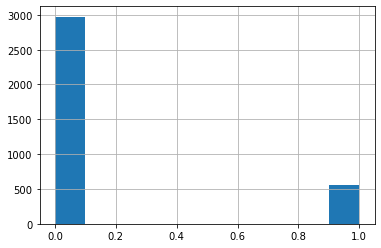

In [131]:
df_labels.hist()
plt.show()

Donc ce modèle n'est pas assez précis : erreur de 0.3

### DecisionTreeRegressor

In [132]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(df_prepared, df_labels)

DecisionTreeRegressor(random_state=42)

In [133]:
df_predictions = tree_reg.predict(df_prepared)
tree_mse = mean_squared_error(df_labels, df_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

#### Cross-validation

In [306]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, df_prepared, df_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [136]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

Résultats pour le DecisionTreeRegressor :

In [138]:
display_scores(tree_rmse_scores)

Scores: [0.43890154 0.41227621 0.44211698 0.49070684 0.41909115 0.43566237
 0.45785558 0.49070684 0.41628771 0.44594129]
Mean: 0.44495464965478215
Standard deviation: 0.026539718540257533


Résultats pour le LinearRegressor :

In [139]:
scores = cross_val_score(lin_reg, df_prepared, df_labels,
                         scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)
display_scores(lin_rmse_scores)

Scores: [0.35595739 0.36177115 0.39108507 0.38238818 0.35672335 0.37006111
 0.35347058 0.38623175 0.39248256 0.37885875]
Mean: 0.3729029880438465
Standard deviation: 0.014406908009984513


### RandomForestRegressor

In [140]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(df_prepared, df_labels)

df_predictions = forest_reg.predict(df_prepared)
forest_mse = mean_squared_error(df_labels, df_predictions)
forest_rmse = np.sqrt(tree_mse)
forest_rmse

0.0

In [147]:
print(df_labels[10:20])
print("Predictions:", [round(prediction) for prediction in df_predictions[10:20]])

EmployeeID
1563    0.0
3129    0.0
4387    1.0
1963    0.0
514     0.0
752     0.0
3176    0.0
2046    0.0
1063    0.0
2497    0.0
Name: Attrition, dtype: float64
Predictions: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]


#### Score pour le RandomForestRegressor

In [141]:
forest_scores = cross_val_score(forest_reg, df_prepared, df_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.33260071 0.32840071 0.37340786 0.36255311 0.34063763 0.34522235
 0.32252545 0.36255311 0.35567637 0.36753942]
Mean: 0.3491116714576862
Standard deviation: 0.016821552315446707


In [285]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # essaye 12 (3×4) combinaisons des hyperparametres
    {'n_estimators': [3, 10, 30, 40], 'max_features': [2, 4, 6, 8]},
    # puis essaye 6 (2×3) combinaisons avec bootstrap à False (True étant la valeur par défaut)
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)

# 5 sous-jeux de cross-val, ça fait en tout (12+6)*5=90 tours d'entraînement 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(df_prepared, df_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30, 40]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [286]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 40}

In [150]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

In [153]:
forest_reg = RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)
forest_reg.fit(df_prepared, df_labels)

cvres_scores = cross_val_score(forest_reg, df_prepared, df_labels,
                                scoring="neg_mean_squared_error", cv=10)
cvres_rmse_scores = np.sqrt(-cvres_scores)
display_scores(cvres_rmse_scores)

Scores: [0.33478438 0.3462602  0.37980994 0.37631733 0.33355989 0.33666886
 0.33290813 0.36881506 0.35277579 0.36888961]
Mean: 0.35307891901063426
Standard deviation: 0.01786223769126821


### Perceptron

In [305]:
from sklearn.linear_model import Perceptron

percept_reg = Perceptron(random_state=42)
percept_reg.fit(df_prepared, df_labels)

Perceptron(random_state=42)

In [307]:
df_predictions = percept_reg.predict(df_prepared)
percept_mse = mean_squared_error(df_labels, df_predictions)
percept_rmse = np.sqrt(percept_mse)
percept_rmse

0.3933978962347216

In [308]:
cvres_scores = cross_val_score(percept_reg, df_prepared, df_labels,
                                scoring="neg_mean_squared_error", cv=10)
cvres_rmse_scores = np.sqrt(-cvres_scores)
display_scores(cvres_rmse_scores)

Scores: [0.38748115 0.40882614 0.47902167 0.4053467  0.39829666 0.39111955
 0.40882614 0.47307086 0.55391171 0.5084513 ]
Mean: 0.44143518699925127
Standard deviation: 0.05503489764805469


# Classification

In [287]:
X_df = df_ethical.copy()
X_df.drop(("general_data", "Attrition"), axis=1, inplace=True)

X = pd.DataFrame()
for table_name in X_df.columns.get_level_values(0).unique():
    for column in X_df.columns:
        X[column] = X_df[column]

y = df_ethical["general_data"]["Attrition"].copy()

#### Constitution du jeu de test et du jeu d'entraînement

In [288]:
train_size = int(len(X)*0.8)
X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]
print(f"Train size: {train_size}\nTest size: {4410-train_size}")

Train size: 3528
Test size: 882


On mélange les données et les étiquettes pour le jeu d'entraînement

In [290]:
shuffle_index = np.random.permutation(train_size)
X_train, y_train = [X.iloc[index] for index in shuffle_index], [y.iloc[index] for index in shuffle_index]

### Classifieur binaire

In [291]:
y_train_1 = [y == 1 for y in y_train]
y_test_1 = [y == 1 for y in y_test]

In [313]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(max_iter=5, random_state=42)

In [314]:
is_attrition = False

while not is_attrition:
    random_index = np.random.randint(len(X_test), size=1)[0]
    some_data = X_test.iloc[random_index]
    is_attrition = y.iloc[random_index] == 1

print(some_data)
print(f"\nAttrition for employee n°{random_index}:", y.iloc[random_index])

(employee_survey_data, EnvironmentSatisfaction)    0.000000
(employee_survey_data, JobSatisfaction)            0.666667
(employee_survey_data, WorkLifeBalance)            0.333333
(general_data, Age)                                0.214286
(general_data, BusinessTravel)                     1.000000
                                                     ...   
(out_time, 2015-12-24)                             0.367575
(out_time, 2015-12-28)                             0.356125
(out_time, 2015-12-29)                             0.405683
(out_time, 2015-12-30)                             0.277545
(out_time, 2015-12-31)                             0.394726
Name: 4033, Length: 519, dtype: float64

Attrition for employee n°504: 1.0


In [315]:
sgd_clf.predict([some_data])

array([0.])

#### Cross-validation

In [316]:
cross_val_score(sgd_clf, X_train, y_train_1, cv=3, scoring="accuracy")

array([0.83588435, 0.83843537, 0.83418367])

In [296]:
from sklearn.base import BaseEstimator
class Never1Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros(len(X))

In [317]:
never_1_clf = Never1Classifier()
cross_val_score(never_1_clf, X_train, y_train_1, cv=3, scoring="accuracy")

array([0.82312925, 0.84778912, 0.83843537])

#### Matrice de confusion

In [320]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_1, cv=3)

In [321]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_1, y_train_pred)

array([[2946,    5],
       [ 573,    4]], dtype=int64)

Comparaison avec un classifieur parfait

In [300]:
y_train_perfect_predictions = y_train_1
confusion_matrix(y_train_1, y_train_perfect_predictions)

array([[2951,    0],
       [   0,  577]], dtype=int64)

### Random forest classifier

In [322]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42, n_estimators=30)
forest_clf.fit(X_train, y_train)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_1, cv=3)

In [328]:
importances = forest_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest_clf.estimators_], axis=0)
std

array([0.00436434, 0.00566446, 0.00389539, 0.01860413, 0.00190973,
       0.00100782, 0.00294013, 0.00196491, 0.00309016, 0.        ,
       0.0016727 , 0.00244516, 0.00458913, 0.00567623, 0.00223592,
       0.01037378, 0.01876192, 0.00171206, 0.00951201, 0.00216872,
       0.00244816, 0.00572663, 0.00414778, 0.00411   , 0.00391384,
       0.00198571, 0.00357469, 0.00313002, 0.0035513 , 0.00400585,
       0.00317633, 0.00346981, 0.00292921, 0.00514282, 0.00325872,
       0.00427505, 0.00387748, 0.00300579, 0.00356241, 0.0035813 ,
       0.00379808, 0.00207086, 0.00372367, 0.00389181, 0.00147148,
       0.0028629 , 0.0046656 , 0.0033936 , 0.00340389, 0.00306308,
       0.00301714, 0.00356735, 0.00391917, 0.00284383, 0.00241279,
       0.00270056, 0.00459038, 0.00378652, 0.00299727, 0.00378064,
       0.00187943, 0.00209371, 0.00204586, 0.00442153, 0.00249646,
       0.00306612, 0.00444771, 0.00282124, 0.00398434, 0.00207416,
       0.00183832, 0.00370907, 0.00364682, 0.00345429, 0.00356

In [350]:
for i in range(len(std)):
    if std[i] >= 0.01:
        print(std[i], X_train[0].keys()[i][-1])

0.018604133443492744 Age
0.010373784982305442 TotalWorkingYears
0.018761923692041185 YearsAtCompany
0.011262446603101883 2015-01-06
0.011202811755176968 2015-02-06
0.01023890204864407 2015-02-18
0.013495432440074805 2015-03-03
0.010481513165213244 2015-06-04
0.011554944775049229 2015-07-16
0.011842661649314426 2015-08-25
0.014198199819636631 2015-08-26
0.010218963555885714 2015-09-23
0.015946252847470494 2015-10-12
0.013314921505660408 2015-10-13
0.010561827542041843 2015-10-22
0.013326050430319064 2015-10-29
0.010051890801115713 2015-11-13
0.010401471870019184 2015-11-27


In [324]:
confusion_matrix(y_train_1, y_probas_forest)

array([[2940,   11],
       [ 549,   28]], dtype=int64)

### Evaluation des métriques

In [354]:
from sklearn.metrics import precision_score, recall_score
precision_score_sgd = precision_score(y_train_1, y_train_pred)
precision_score_forest = precision_score(y_train_1, y_probas_forest)

print(precision_score_sgd, precision_score_forest)

0.4444444444444444 0.717948717948718


In [357]:
recall_score_sgd = recall_score(y_train_1, y_train_pred)
recall_score_forest = recall_score(y_train_1, y_probas_forest)

print(recall_score_sgd, recall_score_forest)

0.006932409012131715 0.04852686308492201


In [359]:
from sklearn.metrics import f1_score
f1_score_sgd = f1_score(y_train_1, y_train_pred)
f1_score_forest = f1_score(y_train_1, y_probas_forest)

print(f1_score_sgd, f1_score_forest)

0.0136518771331058 0.0909090909090909


### Courbe ROC

In [361]:
from sklearn.metrics import roc_curve

y_scores = cross_val_predict(sgd_clf, X_train, y_train_1, cv=3,
                             method="decision_function")

fpr, tpr, thresholds = roc_curve(y_train_1, y_scores)

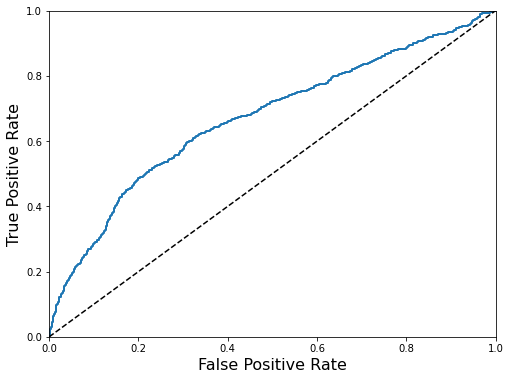

In [364]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
# save_fig("roc_curve_plot")
plt.show()

## <center>  <br /> <br /> VI. RESSOURCES </center>  

## <center>  <br /> <br /> VIII. LEXIQUE </center>  